<a href="https://colab.research.google.com/github/Saonoke/machine-learning-2024/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

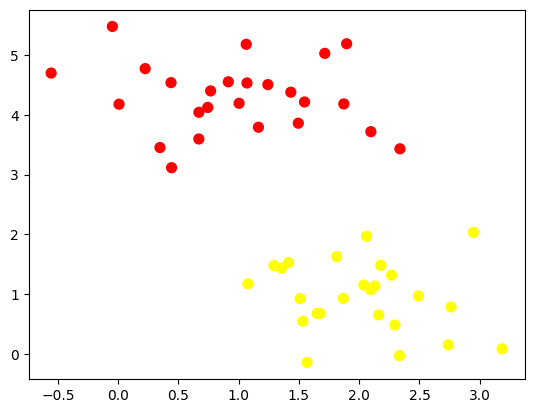

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

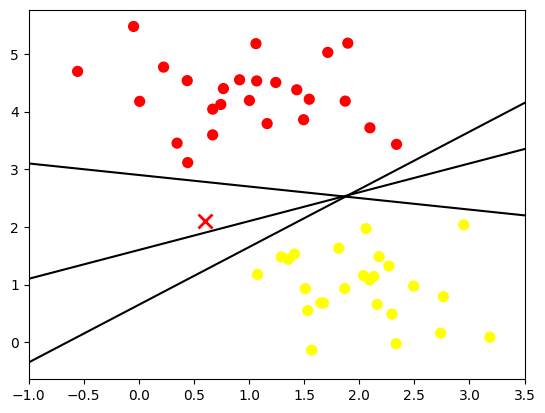

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

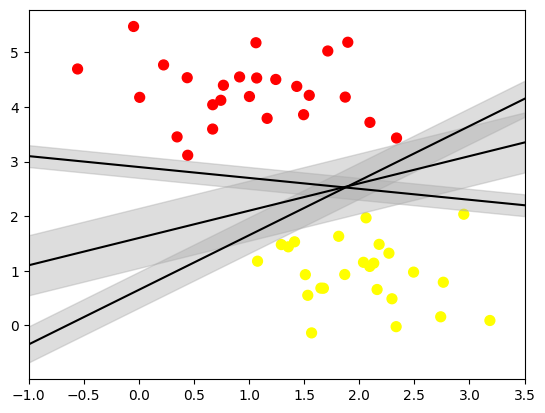

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [7]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

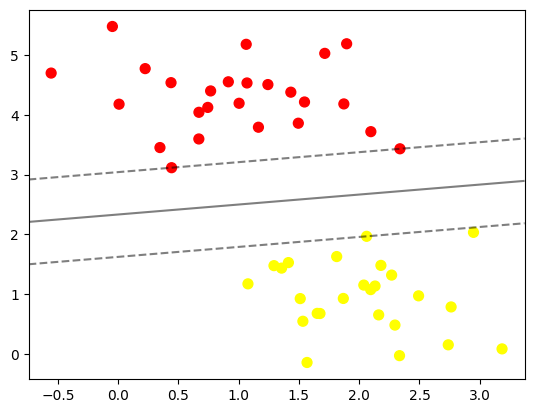

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [9]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

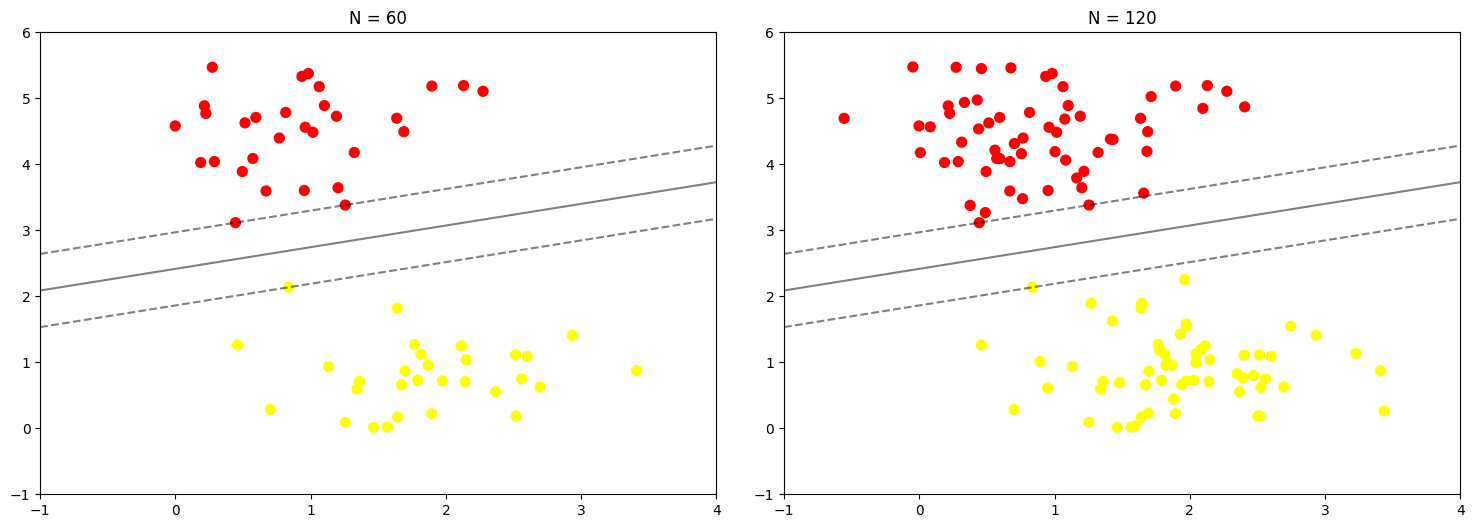

In [10]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

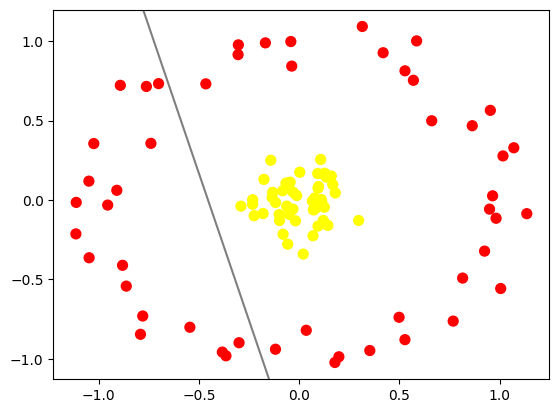

In [11]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [12]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.17987741,  0.04451291],
       [-0.06597901,  0.10623155],
       [ 0.1121578 , -0.01031506],
       [-0.06182743, -0.03839958],
       [ 0.16003512,  0.15109677],
       [ 0.14286617, -0.15995681],
       [ 0.07061779, -0.06150849],
       [-0.11791672, -0.0160995 ],
       [-0.30358169,  0.97757857],
       [ 0.58558738,  1.00269564],
       [ 0.81520185, -0.49203214],
       [-0.7805001 , -0.73099197],
       [ 0.17808579, -1.02386136],
       [-1.04793602, -0.36405094],
       [ 0.92453449, -0.32213275],
       [ 0.00272902,  0.17504769],
       [-0.04178811,  0.99850453],
       [ 0.09385902,  0.07502658],
       [ 0.11987764, -0.12884169],
       [-0.09820656, -0.12896473],
       [-0.01255997,  0.02781073],
       [ 0.08631957, -0.04735533],
       [ 0.0937241 , -0.16457802],
       [ 0.41859588,  0.92799036],
       [-0.2320677 ,  0.00176827],
       [-0.73963129,  0.35701676],
       [ 0.35214013, -0.94860997],
       [ 0.66088413,  0.49936306],
       [ 0.06891947, -0.22504862],
       [ 0.11998355,  0.1635372 ],
       [ 0.07433781, -0.06148186],
       [-0.13227088,  0.048225  ],
       [-0.05398867,  0.08295174],
       [ 0.06550827, -0.00671424],
       [-0.18041309, -0.08519484],
       [ 0.12532344, -0.04560027],
       [ 0.49812302, -0.73901768],
       [-0.03726929,  0.84377636],
       [-0.23213782, -0.02652069],
       [ 0.56957427,  0.75429001],
       [ 0.31468937,  1.09343428],
       [ 0.03508798, -0.82092594],
       [-0.08054722, -0.21585727],
       [-0.03113128, -0.0576722 ],
       [ 0.09253121,  0.16673521],
       [-0.0998905 , -0.09182108],
       [ 0.19784572, -0.98802618],
       [-0.38347535, -0.95843144],
       [-0.54531544, -0.80188879],
       [-0.30494697,  0.91611695],
       [-1.02464539,  0.35550913],
       [-0.0304206 ,  0.04942634],
       [-1.11224527, -0.01510293],
       [ 0.76804777, -0.76304581],
       [-0.11842644, -0.94041334],
       [ 0.09628329,  0.08469606],
       [-0.46579252,  0.73195217],
       [-0.70153038,  0.73343496],
       [-0.17593626,  0.12990241],
       [-0.88124255, -0.4115339 ],
       [ 0.96459732,  0.02646846],
       [-0.89229848,  0.72259567],
       [-0.76237614,  0.71545078],
       [ 0.52758608,  0.81404975],
       [-0.29065109, -0.03882468],
       [-0.01850095, -0.13139297],
       [ 1.07044374,  0.3291145 ],
       [-0.05746739, -0.27846442],
       [ 0.13533761,  0.14400279],
       [-0.05030652, -0.09050896],
       [-0.05323405,  0.10850867],
       [ 1.0163161 ,  0.27760145],
       [-0.224688  , -0.0987629 ],
       [-0.36532823, -0.98171833],
       [-0.13525396,  0.01574261],
       [-1.11388705, -0.21366981],
       [ 0.86304568,  0.46808724],
       [-0.04524965,  0.11237856],
       [-1.04900059,  0.11875843],
       [-0.90973776,  0.06113738],
       [ 0.16712687,  0.09710102],
       [ 0.52739904, -0.88004039],
       [-0.95528399, -0.03192325],
       [ 0.0781786 ,  0.01301399],
       [ 0.11042993,  0.00218238],
       [ 0.29640333, -0.12909557],
       [-0.30014268, -0.89944758],
       [ 0.98199848, -0.11501654],
       [-0.16873446,  0.99014125],
       [-0.08234609,  0.05813688],
       [ 1.13518779, -0.08626162],
       [ 0.10703731,  0.25538522],
       [ 0.94937254, -0.05757951],
       [-0.86264914, -0.54269694],
       [ 0.95328977,  0.56493556],
       [-0.14189896,  0.25038332],
       [ 1.00499551, -0.55774413],
       [ 0.02006512, -0.34107171],
       [ 0.12710546,  0.16856883],
       [-0.79168752, -0.84631727]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]))>

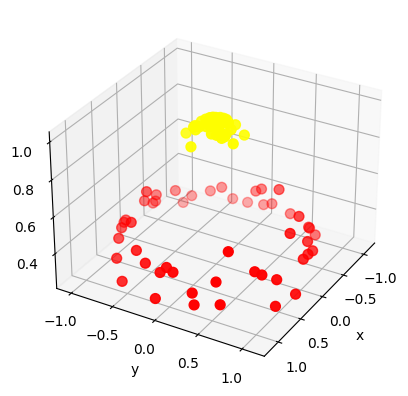

In [15]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.17987741,  0.04451291],
       [-0.06597901,  0.10623155],
       [ 0.1121578 , -0.01031506],
       [-0.06182743, -0.03839958],
       [ 0.16003512,  0.15109677],
       [ 0.14286617, -0.15995681],
       [ 0.07061779, -0.06150849],
       [-0.11791672, -0.0160995 ],
       [-0.30358169,  0.97757857],
       [ 0.58558738,  1.00269564],
       [ 0.81520185, -0.49203214],
       [-0.7805001 , -0.73099197],
       [ 0.17808579, -1.02386136],
       [-1.04793602, -0.36405094],
       [ 0.92453449, -0.32213275],
       [ 0.00272902,  0.17504769],
       [-0.04178811,  0.99850453],
       [ 0.09385902,  0.07502658],
       [ 0.11987764, -0.12884169],
       [-0.09820656, -0.12896473],
       [-0.01255997,  0.02781073],
       [ 0.08631957, -0.04735533],
       [ 0.0937241 , -0.16457802],
       [ 0.41859588,  0.92799036],
       [-0.2320677 ,  0.00176827],
       [-0.73963129,  0.35701676],
       [ 0.35214013, -0.94860997],
       [ 0.66088413,  0.49936306],
       [ 0.06891947, -0.22504862],
       [ 0.11998355,  0.1635372 ],
       [ 0.07433781, -0.06148186],
       [-0.13227088,  0.048225  ],
       [-0.05398867,  0.08295174],
       [ 0.06550827, -0.00671424],
       [-0.18041309, -0.08519484],
       [ 0.12532344, -0.04560027],
       [ 0.49812302, -0.73901768],
       [-0.03726929,  0.84377636],
       [-0.23213782, -0.02652069],
       [ 0.56957427,  0.75429001],
       [ 0.31468937,  1.09343428],
       [ 0.03508798, -0.82092594],
       [-0.08054722, -0.21585727],
       [-0.03113128, -0.0576722 ],
       [ 0.09253121,  0.16673521],
       [-0.0998905 , -0.09182108],
       [ 0.19784572, -0.98802618],
       [-0.38347535, -0.95843144],
       [-0.54531544, -0.80188879],
       [-0.30494697,  0.91611695],
       [-1.02464539,  0.35550913],
       [-0.0304206 ,  0.04942634],
       [-1.11224527, -0.01510293],
       [ 0.76804777, -0.76304581],
       [-0.11842644, -0.94041334],
       [ 0.09628329,  0.08469606],
       [-0.46579252,  0.73195217],
       [-0.70153038,  0.73343496],
       [-0.17593626,  0.12990241],
       [-0.88124255, -0.4115339 ],
       [ 0.96459732,  0.02646846],
       [-0.89229848,  0.72259567],
       [-0.76237614,  0.71545078],
       [ 0.52758608,  0.81404975],
       [-0.29065109, -0.03882468],
       [-0.01850095, -0.13139297],
       [ 1.07044374,  0.3291145 ],
       [-0.05746739, -0.27846442],
       [ 0.13533761,  0.14400279],
       [-0.05030652, -0.09050896],
       [-0.05323405,  0.10850867],
       [ 1.0163161 ,  0.27760145],
       [-0.224688  , -0.0987629 ],
       [-0.36532823, -0.98171833],
       [-0.13525396,  0.01574261],
       [-1.11388705, -0.21366981],
       [ 0.86304568,  0.46808724],
       [-0.04524965,  0.11237856],
       [-1.04900059,  0.11875843],
       [-0.90973776,  0.06113738],
       [ 0.16712687,  0.09710102],
       [ 0.52739904, -0.88004039],
       [-0.95528399, -0.03192325],
       [ 0.0781786 ,  0.01301399],
       [ 0.11042993,  0.00218238],
       [ 0.29640333, -0.12909557],
       [-0.30014268, -0.89944758],
       [ 0.98199848, -0.11501654],
       [-0.16873446,  0.99014125],
       [-0.08234609,  0.05813688],
       [ 1.13518779, -0.08626162],
       [ 0.10703731,  0.25538522],
       [ 0.94937254, -0.05757951],
       [-0.86264914, -0.54269694],
       [ 0.95328977,  0.56493556],
       [-0.14189896,  0.25038332],
       [ 1.00499551, -0.55774413],
       [ 0.02006512, -0.34107171],
       [ 0.12710546,  0.16856883],
       [-0.79168752, -0.84631727]]), y=array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0]))>

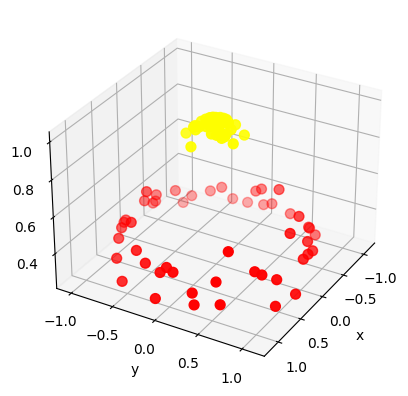

In [20]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

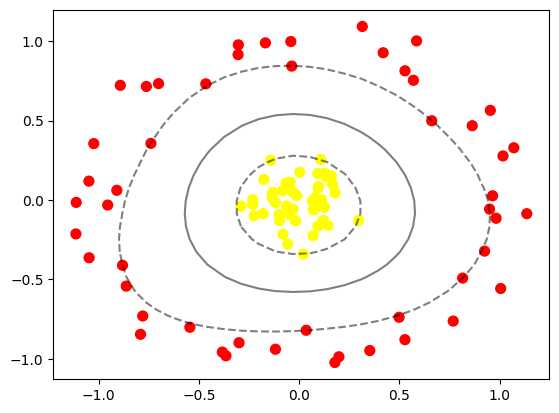

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

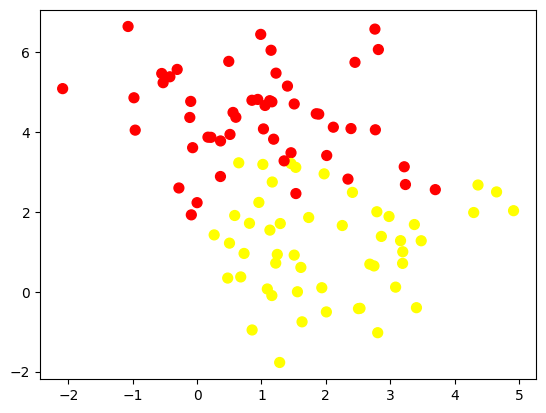

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

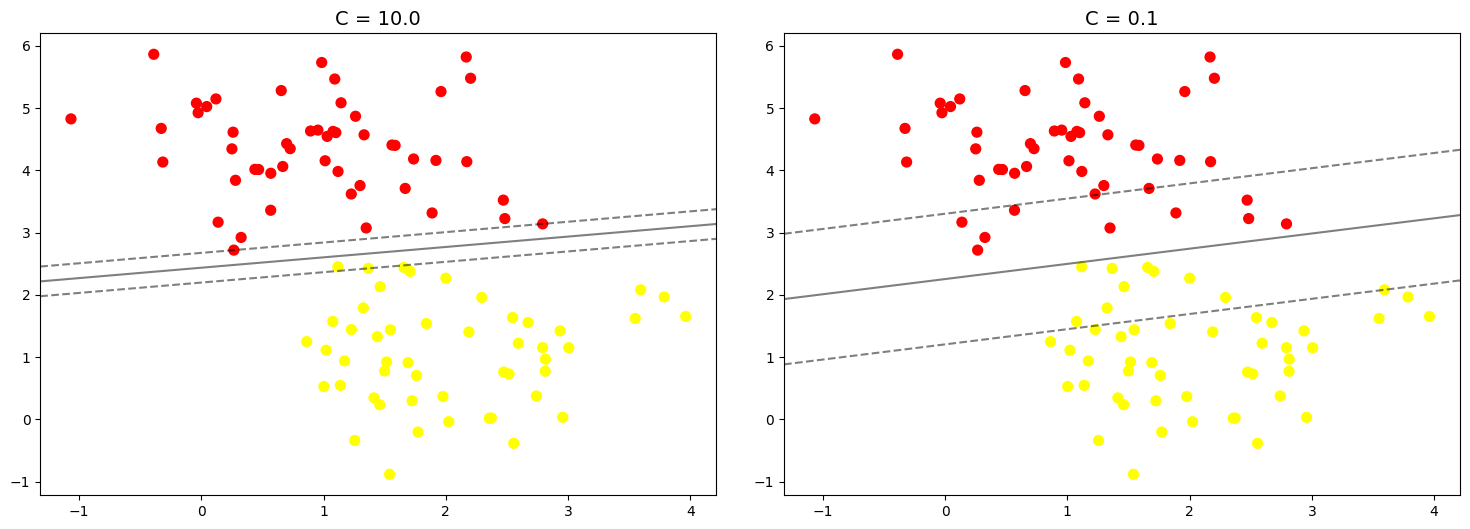

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)